In [1]:
# importações
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
iris=pd.read_csv('/home/amador/dados/iris.csv')

In [3]:
iris.head(3)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
# separando dados (atributos)
X=iris.drop('class',axis=1)
# visualizando os 10 primeiros registros
X[:10]

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
# separando dados (class)
y=iris['class']
# visualizando os valores únicos
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# convertendo valores categóricos em numéricos
def converte_classe(l):
    if l=='Iris-virginica':
        return 0
    if l=='Iris-setosa':
        return 1
    if l=='Iris-versicolor':
        return 2

In [7]:
# aplicando função na classe
y=y.apply(converte_classe)
y.value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

### Instanciando o KMeans

In [8]:
# com k=3 e inicialização aleatória
kmeans=KMeans(n_clusters=3,init='random')
# agrupando o algoritmo
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

In [9]:
# centroids
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

In [10]:
# tabela de distância
distance=kmeans.fit_transform(X)
distance

array([[0.14694217, 5.0595416 , 3.41925061],
       [0.43816892, 5.11494335, 3.39857426],
       [0.41230086, 5.27935534, 3.56935666],
       [0.51883716, 5.15358977, 3.42240962],
       [0.19796969, 5.10433388, 3.46726403],
       [0.68380699, 4.68148797, 3.14673162],
       [0.41520116, 5.21147652, 3.51650264],
       [0.0599333 , 5.00252706, 3.33654987],
       [0.80099438, 5.32798107, 3.57233779],
       [0.36659514, 5.06790865, 3.3583767 ],
       [0.48784424, 4.89806763, 3.32449131],
       [0.25138019, 4.9966845 , 3.31126872],
       [0.49192682, 5.19103612, 3.46661272],
       [0.90906105, 5.65173594, 3.90578362],
       [1.02019214, 5.10804455, 3.646649  ],
       [1.21309192, 4.88564095, 3.49427881],
       [0.66241377, 5.03090587, 3.495248  ],
       [0.1509702 , 5.02342022, 3.38444981],
       [0.82848778, 4.61792995, 3.11245944],
       [0.39898872, 4.97213426, 3.37738931],
       [0.46172719, 4.6955761 , 3.07471224],
       [0.33762701, 4.9236821 , 3.31506588],
       [0.

In [11]:
# distância da primeira amostra
distance[0]

array([0.14694217, 5.0595416 , 3.41925061])

<IPython.core.display.Javascript object>


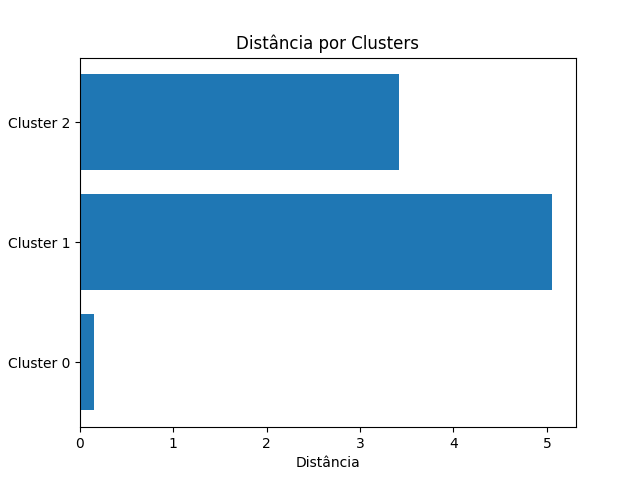

In [12]:
# visualização dos valores de distância para cada cluster
%matplotlib notebook
x=['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0]) #barra horizontal
plt.xlabel('Distância')
plt.title('Distância por Clusters')
plt.show();

In [13]:
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [14]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [15]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [16]:
# centroides do sepallength
kmeans.cluster_centers_[:,0]

array([5.006    , 6.85     , 5.9016129])

In [17]:
# centroids do sepalwidth
kmeans.cluster_centers_[:,1]

array([3.418     , 3.07368421, 2.7483871 ])

<IPython.core.display.Javascript object>


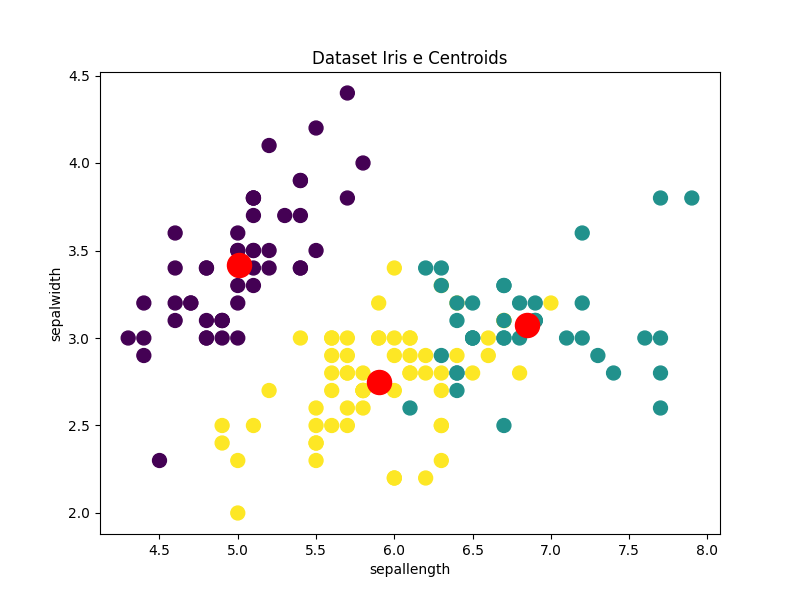

In [18]:
# visualizando os centroids (pontos de referência - espécie de valor médio)
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['sepallength'],X['sepalwidth'],s=100,c=kmeans.labels_) # gráfico tipo scatter com 2 atributos e colorindo pelas labels
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='centroids') # gráfico scatter com os 2 primeiros atributos
# titulos
plt.title('Dataset Iris e Centroids')
plt.xlabel('sepallength')
plt.ylabel('sepalwidth')
plt.show();

In [19]:
# agrupando novos dados
data= [
    [4.12,3.4,1.6,0.7],
    [5.2,5.8,5.2,6.7],
    [3.1,3.5,3.3,3.0]

]
# predizendo
kmeans.predict(data)

array([0, 1, 2], dtype=int32)

<IPython.core.display.Javascript object>


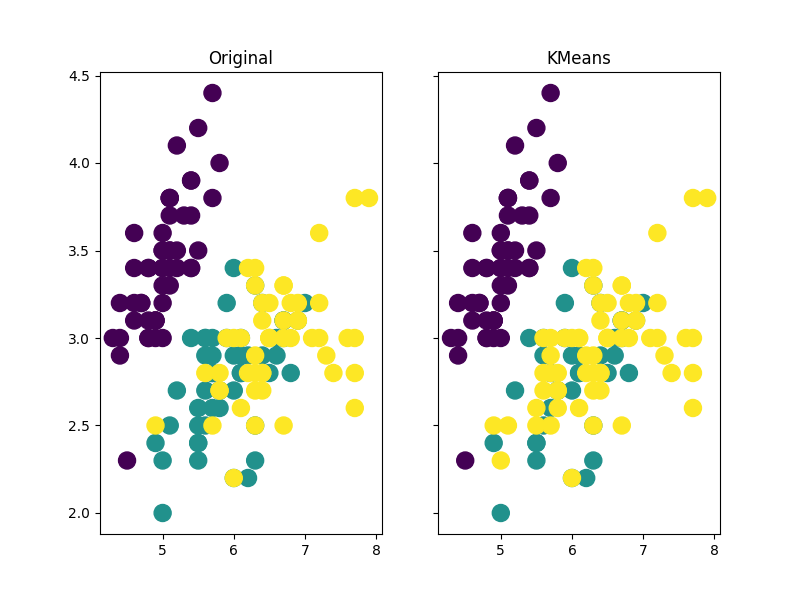

In [20]:
# visualizando ('validando') resultados do algoritmo
%matplotlib notebook
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(8,6))
# sharey controla o compartilhamento de propriedades entre os eixos x ( sharex) ou y ( sharey)
# True ou 'all': o eixo x ou y será compartilhado entre todas as subparcelas
ax1.set_title('Original')
ax1.scatter(X['sepallength'],X['sepalwidth'],s=150,c=sorted(y)) # colorindo pelos dados originais da classe (y) com sorted para ordenamento (0,1,2)
ax2.set_title('KMeans')
ax2.scatter(X['sepallength'],X['sepalwidth'],s=150,c=sorted(kmeans.labels_)); # utilizando os labels retornado pelo kmeans ao invés dos dados reais de classe

### Estimando o valor de K

1 680.8243999999996
2 152.36870647733915
3 78.94084142614601
4 57.317873214285726
5 46.56163015873017
6 38.930963049671746
7 34.911836039422354
8 29.881402210510913
9 27.964318181818197
10 26.883187450313116


<IPython.core.display.Javascript object>


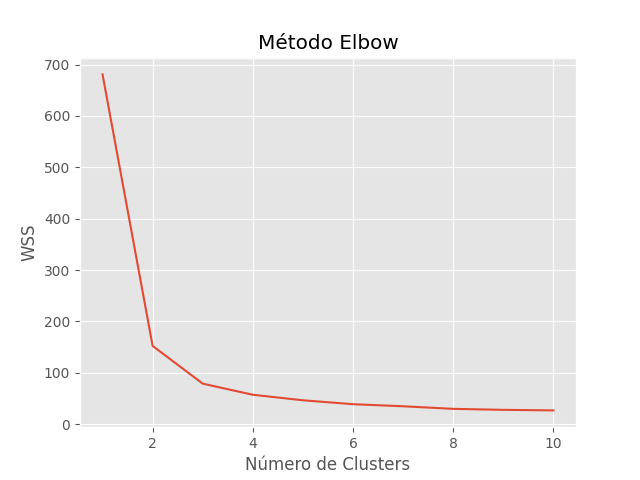

In [25]:
# Estimando o valor de K - Método Elbow (cotovelo)
# esse método tenta encontar um número de k onde a variância dos dados em relação ao número de clusters não seja tão representativo
%matplotlib notebook
wcss =[]

for i in range(1,11):
    kmeans2=KMeans(n_clusters=i,init='random') # instância o kmeans para cada iteração do range
    kmeans2.fit(X) # agrupando para cada instância
    print(i,kmeans2.inertia_) # imprime o valor corrente inertia com o inertia para fazer o somatório dos erros quadráticos daquele cluster
    wcss.append(kmeans2.inertia_) # adicionando os erros a uma lista
    
    #kmeans com 1 cluster, ou seja somatório de todos, o erro será grande, com 2 já cai bastante, dai em diante
plt.plot(range(1,11),wcss)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WSS') # within cluster sum of squares
style.use('ggplot')
plt.show()

# graficamente dá para perceber que do 4 em diante o erro não há muita variação, ou seja, os erros ficam 'estabilizados', logo o parâmetro k ideal é o valor 3

### Validação
* com kmeans e não kmeans2

In [22]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [23]:
# matriz de confusão
print(pd.crosstab(y,kmeans.labels_,rownames=['Real'],colnames=['Predito']))

Predito   0   1   2
Real               
0         0  36  14
1        50   0   0
2         0   2  48


In [24]:
# métricas
from sklearn import metrics
clusters=['Cluster 0', 'Cluster 1','Cluster 2']
print(metrics.classification_report(sorted(y),sorted(kmeans.labels_),target_names=clusters))

              precision    recall  f1-score   support

   Cluster 0       1.00      1.00      1.00        50
   Cluster 1       1.00      0.76      0.86        50
   Cluster 2       0.81      1.00      0.89        50

    accuracy                           0.92       150
   macro avg       0.94      0.92      0.92       150
weighted avg       0.94      0.92      0.92       150

